# Newton-Raphson Method Examples

This notebook demonstrates the Newton-Raphson method for solving various nonlinear equations, including mechanical engineering applications.

## Setup and Imports

In [3]:
# Add this at the beginning of the first code cell
import sys
import os

# Add parent directory to Python path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Rest of the imports
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from src.newton_raphson_script import newton_raphson
from IPython.display import HTML
import matplotlib.animation as animation

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from src.newton_raphson_script import newton_raphson
from IPython.display import HTML
import matplotlib.animation as animation

def animate_convergence(f, result, x_range):
    """Create animation of Newton-Raphson convergence"""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot function
    x = np.linspace(x_range[0], x_range[1], 1000)
    y = [f(xi) for xi in x]
    ax.plot(x, y, 'b-', label='f(x)')
    ax.axhline(y=0, color='k', linestyle='--')
    
    # Animation function
    def animate(i):
        ax.clear()
        ax.plot(x, y, 'b-', label='f(x)')
        ax.axhline(y=0, color='k', linestyle='--')
        
        # Plot current point
        xi = result.iterations[i]
        yi = f(xi)
        
        # Plot tangent line
        deriv = (f(xi + 1e-7) - f(xi - 1e-7)) / (2e-7)
        x_tan = np.array([xi - 1, xi + 1])
        y_tan = deriv * (x_tan - xi) + yi
        
        ax.plot(x_tan, y_tan, 'r--')
        ax.plot(xi, yi, 'ro')
        
        ax.set_xlim(x_range)
        ax.set_ylim([min(y), max(y)])
        ax.grid(True)
        ax.set_title(f'Iteration {i}')
    
    anim = animation.FuncAnimation(fig, animate, frames=len(result.iterations), 
                                  interval=1000, repeat=False)
    return HTML(anim.to_jshtml())

## Example 1
Let's solve: x³ - 2x - 5 = 0

Jacobian is not square. using the psudo inverse
root = [1.8932893], f(root) = [9.0150558e-07]
number of iterations = 28


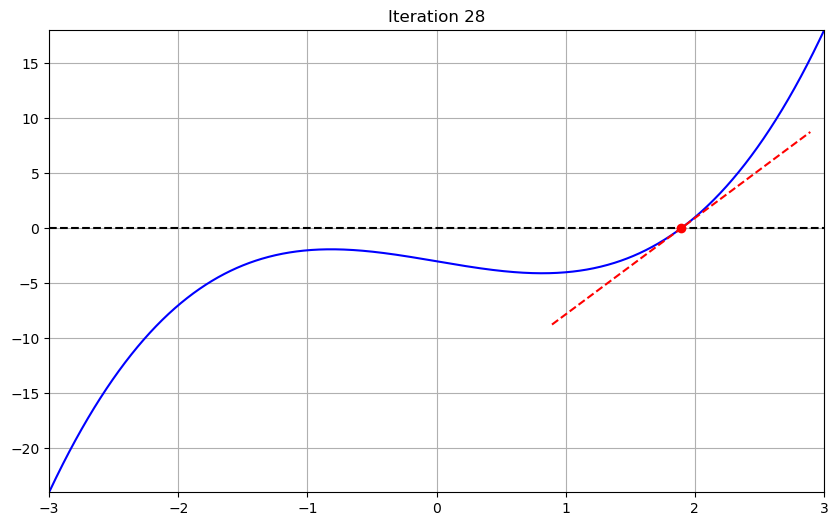

In [5]:
x = sp.symbols('x')
f1 = x**3 - 2*x - 3
J1 = sp.diff(f1, x)
f1 = sp.lambdify(x, f1)
J1 = sp.lambdify(x, J1)
result1 = newton_raphson(f1, J1, init_guess=-2.0)
print(f"root = {result1.root}, f(root) = {f1(result1.root)}")
print(f"number of iterations = {result1.iterations_count}")
animate_convergence(f1, result1, [-3, 3])

# Example 2 - Rosenbrock Function
$$x = cos(x)$$

In [6]:
x = sp.symbols('x')
f2 = sp.cos(x) - x
J2 = sp.diff(f2, x)
f2 = sp.lambdify(x, f2)
J2 = sp.lambdify(x, J2)
result2 = newton_raphson(f2, J2, init_guess=1, max_iter=1000)
print(f"root = {result2.root}, f(root) = {f2(result2.root)}")
print(f"number of iterations = {result2.iterations_count}")

Jacobian is not square. using the psudo inverse
root = [0.73908513], f(root) = [-2.8444147e-10]
number of iterations = 3


## Example 3:
$$xe^x - 2 = 0$$

Jacobian is not square. using the psudo inverse
root = [0.85260553], f(root) = [1.05843441e-07]
number of iterations = 4


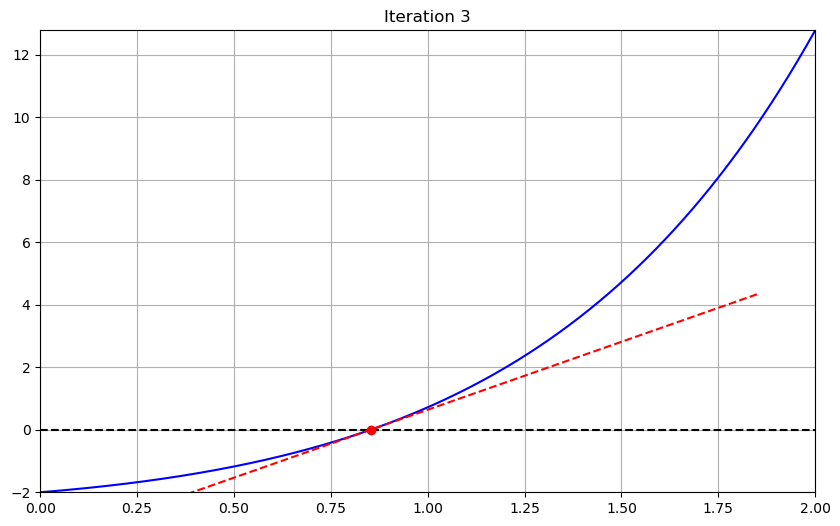

In [7]:
x = sp.symbols('x')
f3 = x*sp.exp(x) - 2
J3 = sp.diff(f3, x)
f3 = sp.lambdify(x, f3)
J3 = sp.lambdify(x, J3)
result3 = newton_raphson(f3, J3, init_guess=1.0)
print(f"root = {result3.root}, f(root) = {f3(result3.root)}")
print(f"number of iterations = {len(result3.iterations)}")
animate_convergence(f3, result3, [0, 2])

# Example 4 - Mechanical Engineering Application
* 2 DoF system with the balance of forces equation as follows where l = 10, K_AB = 100, K_BC = 200, F = 0.1:
                    ![2DoF System](figs/image.png)
$$\Sigma F_x = \frac{200 \left(10 - u\right) \left(\sqrt{v^{2} + \left(10 - u\right)^{2}} - 10\right)}{\sqrt{v^{2} + \left(10 - u\right)^{2}}} + \frac{100 \left(- u - 10\right) \left(\sqrt{v^{2} + \left(u + 10\right)^{2}} - 10\right)}{\sqrt{v^{2} + \left(u + 10\right)^{2}}}$$
$$\Sigma F_y = \frac{100 v \left(\sqrt{v^{2} + \left(u + 10\right)^{2}} - 10\right)}{\sqrt{v^{2} + \left(u + 10\right)^{2}}} + \frac{200 v \left(\sqrt{v^{2} + \left(10 - u\right)^{2}} - 10\right)}{\sqrt{v^{2} + \left(10 - u\right)^{2}}} - 0.1$$

In [8]:
from sympy import sqrt
v, u = sp.symbols('v u')
l = 10
K_AB = 100
K_BC = 200
F = 0.1
# Define the equation
Sig_F_y = (v / sqrt(v**2 + (l + u)**2)) * K_AB * (sqrt(v**2 + (l + u)**2) - l) + (v / sqrt(v**2 + (l - u)**2)) * K_BC * (sqrt(v**2 + (l - u)**2) - l) - F
Sig_F_x = -(l + u) / sqrt(v**2 + (l + u)**2) * K_AB * (sqrt(v**2 + (l + u)**2) - l) + (l - u) / sqrt(v**2 + (l - u)**2) * K_BC * (sqrt(v**2 + (l - u)**2) - l)
F = sp.Matrix([Sig_F_x, Sig_F_y])
latex_eq = sp.latex(F)
J = F.jacobian([u, v])
f_num = sp.lambdify((u, v), F, 'numpy')
J_num = sp.lambdify((u, v), J, 'numpy')
f_multi = lambda X: np.array(f_num(X[0], X[1])).flatten()
J_multi = lambda X: np.array(J_num(X[0], X[1]))

result4 = newton_raphson(f_multi, J_multi, init_guess=[1.0, 1.0], max_iter = 1000)
print(f"roots (u, v) = {result4.root}")
print("number of iterations:", result4.iterations_count)

roots (u, v) = [0.00296803 0.42190384]
number of iterations: 8


# Example 5 - Inverse Kinematics of a robotic arm



* This is a 2-DoF robotic arm that we want to find the joint angles for a given target position (x, y).
L1 = 4", L2 = 3.025", x_target = -0.7154, y_target = 6.9635. The equations are as follows: [based on "Math, Numerics, & Programming
(for Mechanical Engineers)" by Yano et al.]
$$4 \cos{\left(\theta_{1} \right)} + 3.025 \cos{\left(\theta_{1} + \theta_{2} \right)} + 0.7154$$
$$4 \sin{\left(\theta_{1} \right)} + 3.025 \sin{\left(\theta_{1} + \theta_{2} \right)} - 6.9635$$

<div align="center">
    <img src="figs/robot.png" width="250"/>
</div>

In [9]:
theta1, theta2 = sp.symbols('theta1 theta2')
L1 = 4
L2 = 3.025
x_target = -0.7154
y_target = 6.9635
# Define the system of equations for the inverse kinematics problem
x_eq = L1 * sp.cos(theta1) + L2 * sp.cos(theta1 + theta2) - x_target
y_eq = L1 * sp.sin(theta1) + L2 * sp.sin(theta1 + theta2) - y_target
F = sp.Matrix([x_eq, y_eq])
J = F.jacobian([theta1, theta2])
f_num = sp.lambdify((theta1, theta2), F, 'numpy')
J_num = sp.lambdify((theta1, theta2), J, 'numpy')
f_multi = lambda X: np.array(f_num(X[0], X[1])).flatten()
J_multi = lambda X: np.array(J_num(X[0], X[1]))
result5 = newton_raphson(f_multi, J_multi, init_guess=[0.5, 0.5], max_iter = 1000)
print(f"roots (theta1, theta2) [rad]= {result5.root}")
print("number of iterations:", result5.iterations_count)


roots (theta1, theta2) [rad]= [1.60003504 0.16991375]
number of iterations: 8


## Summary of Results

Let's compare the convergence of all examples:

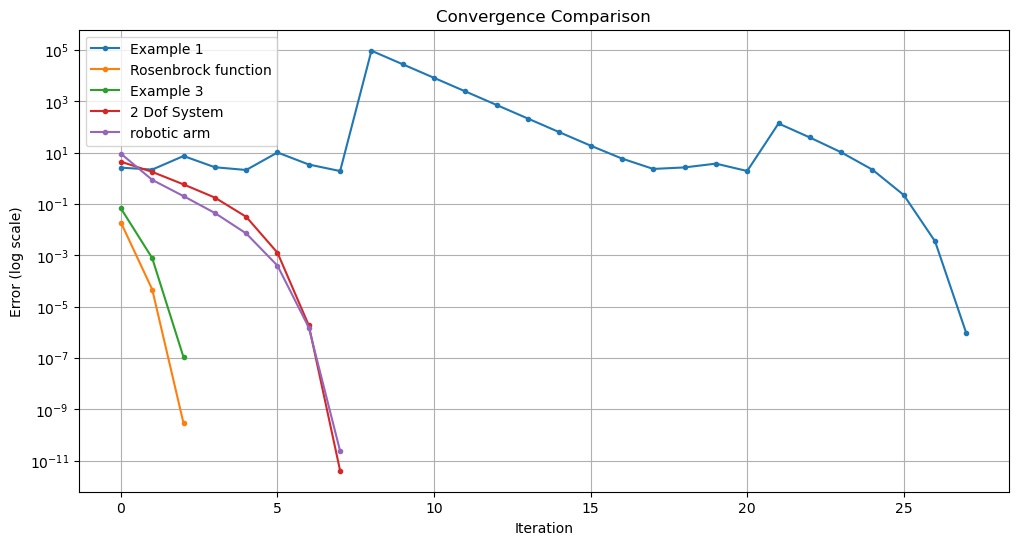

Final Results:
Example 1      : Root = [1.8932893], Iterations = 28
Rosenbrock function: Root = [0.73908513], Iterations = 3
Example 3      : Root = [0.85260553], Iterations = 3
2 Dof System   : Root = [0.00296803 0.42190384], Iterations = 8
robotic arm    : Root = [1.60003504 0.16991375], Iterations = 8


In [10]:
results = {
    'Example 1': result1,
    'Rosenbrock function': result2,
    'Example 3': result3,
    '2 Dof System': result4,
    'robotic arm': result5
}

plt.figure(figsize=(12, 6))
for name, result in results.items():
    plt.semilogy(range(len(result.errors)), result.errors, '.-', label=name)

plt.xlabel('Iteration')
plt.ylabel('Error (log scale)')
plt.title('Convergence Comparison')
plt.grid(True)
plt.legend()
plt.show()

# Print final results
print("Final Results:")
for name, result in results.items():
    print(f"{name:15s}: Root = {result.root}, Iterations = {result.iterations_count}")